In [1]:
import sys
sys.path.insert(1, './env')
sys.path.insert(1, './agents')

import gym
import pylab
import random
import aa_gun
import strategy_imitation, sarsa
import numpy as np
from collections import deque
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt


EPISODES = 30000

Using TensorFlow backend.


In [ ]:
# In case of CartPole-v1, maximum length of episode is 500
#env = aa_gun.AA_gun_simple0_env()
#env = gym.make('AirRaid-ram-v0')
#env = gym.make('Robotank-ramNoFrameskip-v0')
env = gym.make('Seaquest-ramNoFrameskip-v0')
#env=CartPoleEnv9()
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

#agent = DoubleDQNAgent(state_size, action_size)
agent = sarsa.SarsaAgent(state_size, action_size)
agent.train_start=750
#agent = strategy_imitation.ImitAgent(state_size, action_size)
agent.render=True

scores, episodes = [], []
reward_lst = []
s_list=[]
a_list=[]

for e in range(EPISODES):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, state_size])

    while not done:
        if (e in range(30,35)) or (e in range(100,103)) or (e in range(200,202)) or (e in range(300,306)) or (e in range(400,406)) or (e in range(500,506)) or (e in range(600,604)):
            if agent.render:
                env.render()

        # get action for the current state and go one step in environment
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # if an action make the episode end, then gives penalty of -100
        

        # save the sample <s, a, r, s'> to the replay memory
        if done:
            reward_curr -= 100
        else:
            reward_curr=reward
        agent.append_sample(state, action, reward_curr, next_state, done)
        #if next_state[0,11]!=reward:
        #    print('state[13]!=reward',state[0,11],reward)
        #
        s_list.append(state)
        a_list.append(action)
        reward_lst.append(reward)
        #
        
        # every time step do the training
        agent.train_model()
        score += reward
        state = next_state

        if done:
            # every episode update the target model to be same with model
            agent.update_target_model()

            # every episode, plot the play time
            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes, scores, 'b')
            #pylab.savefig("./save_graph/aa_gun_dqn.png")
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon)

            # if the mean of scores of last 10 episode is bigger than 490
            # stop training

    # save the model
    #if e % 50 == 0:
    #    agent.model.save_weights("./save_model/aa_gun_dqn.h5")

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 100)               12900     
_________________________________________________________________
batch_normalization_21 (Batc (None, 100)               400       
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_22 (Batc (None, 100)               400       
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)               

Epoch 9/10
500/500 [==============================] - 0s 25us/step - loss: 1.8874
Epoch 10/10
500/500 [==============================] - 0s 21us/step - loss: 2.1530
Epoch 1/10
500/500 [==============================] - 0s 36us/step - loss: 3.8049
Epoch 2/10
500/500 [==============================] - 0s 32us/step - loss: 3.7111
Epoch 3/10
500/500 [==============================] - 0s 30us/step - loss: 3.1262
Epoch 4/10
500/500 [==============================] - 0s 38us/step - loss: 3.2400
Epoch 5/10
500/500 [==============================] - 0s 20us/step - loss: 3.6838
Epoch 6/10
500/500 [==============================] - 0s 30us/step - loss: 3.2173
Epoch 7/10
500/500 [==============================] - 0s 25us/step - loss: 3.3037
Epoch 8/10
500/500 [==============================] - 0s 19us/step - loss: 3.1418
Epoch 9/10
500/500 [==============================] - 0s 21us/step - loss: 3.0468
Epoch 10/10
500/500 [==============================] - 0s 26us/step - loss: 2.6695
delta_r 1.5925

Epoch 7/10
500/500 [==============================] - 0s 23us/step - loss: 1.2945
Epoch 8/10
500/500 [==============================] - 0s 23us/step - loss: 1.2298
Epoch 9/10
500/500 [==============================] - 0s 22us/step - loss: 1.2828
Epoch 10/10
500/500 [==============================] - 0s 20us/step - loss: 1.3253
Epoch 1/10
500/500 [==============================] - 0s 20us/step - loss: 1.8844
Epoch 2/10
500/500 [==============================] - 0s 27us/step - loss: 1.9835
Epoch 3/10
500/500 [==============================] - 0s 23us/step - loss: 1.8912
Epoch 4/10
500/500 [==============================] - 0s 22us/step - loss: 1.8362
Epoch 5/10
500/500 [==============================] - 0s 20us/step - loss: 1.8835
Epoch 6/10
500/500 [==============================] - 0s 21us/step - loss: 1.8023
Epoch 7/10
500/500 [==============================] - 0s 21us/step - loss: 1.9364
Epoch 8/10
500/500 [==============================] - 0s 23us/step - loss: 1.6189
Epoch 9/10
500/

Epoch 5/10
500/500 [==============================] - 0s 22us/step - loss: 0.7829
Epoch 6/10
500/500 [==============================] - 0s 23us/step - loss: 0.7773
Epoch 7/10
500/500 [==============================] - 0s 25us/step - loss: 0.7651
Epoch 8/10
500/500 [==============================] - 0s 20us/step - loss: 0.6997
Epoch 9/10
500/500 [==============================] - 0s 33us/step - loss: 0.7529
Epoch 10/10
500/500 [==============================] - 0s 22us/step - loss: 0.7351
Epoch 1/10
500/500 [==============================] - 0s 21us/step - loss: 1.3025
Epoch 2/10
500/500 [==============================] - 0s 22us/step - loss: 1.1060
Epoch 3/10
500/500 [==============================] - 0s 22us/step - loss: 1.1264
Epoch 4/10
500/500 [==============================] - 0s 20us/step - loss: 1.3020
Epoch 5/10
500/500 [==============================] - 0s 25us/step - loss: 1.1300
Epoch 6/10
500/500 [==============================] - 0s 19us/step - loss: 1.1333
Epoch 7/10
500/

Epoch 3/10
500/500 [==============================] - 0s 24us/step - loss: 0.4919
Epoch 4/10
500/500 [==============================] - 0s 22us/step - loss: 0.5109
Epoch 5/10
500/500 [==============================] - 0s 20us/step - loss: 0.5190
Epoch 6/10
500/500 [==============================] - 0s 22us/step - loss: 0.4984
Epoch 7/10
500/500 [==============================] - 0s 20us/step - loss: 0.4601
Epoch 8/10
500/500 [==============================] - 0s 25us/step - loss: 0.4981
Epoch 9/10
500/500 [==============================] - 0s 21us/step - loss: 0.5044
Epoch 10/10
500/500 [==============================] - 0s 22us/step - loss: 0.5099
Epoch 1/10
500/500 [==============================] - 0s 25us/step - loss: 0.8173
Epoch 2/10
500/500 [==============================] - 0s 26us/step - loss: 0.8111
Epoch 3/10
500/500 [==============================] - 0s 24us/step - loss: 0.7878
Epoch 4/10
500/500 [==============================] - 0s 23us/step - loss: 0.9126
Epoch 5/10
500/

Epoch 1/10
500/500 [==============================] - 0s 21us/step - loss: 0.3718
Epoch 2/10
500/500 [==============================] - 0s 20us/step - loss: 0.3500
Epoch 3/10
500/500 [==============================] - 0s 21us/step - loss: 0.3585
Epoch 4/10
500/500 [==============================] - 0s 23us/step - loss: 0.3715
Epoch 5/10
500/500 [==============================] - 0s 25us/step - loss: 0.3691
Epoch 6/10
500/500 [==============================] - 0s 21us/step - loss: 0.3388
Epoch 7/10
500/500 [==============================] - 0s 22us/step - loss: 0.3677
Epoch 8/10
500/500 [==============================] - 0s 24us/step - loss: 0.3355
Epoch 9/10
500/500 [==============================] - 0s 24us/step - loss: 0.3391
Epoch 10/10
500/500 [==============================] - 0s 22us/step - loss: 0.3411
Epoch 1/10
500/500 [==============================] - 0s 25us/step - loss: 0.6126
Epoch 2/10
500/500 [==============================] - 0s 20us/step - loss: 0.5503
Epoch 3/10
500/

Epoch 10/10
500/500 [==============================] - 0s 19us/step - loss: 0.4487
delta_r 0.0963950282897178 r 0.0
Epoch 1/10
500/500 [==============================] - 0s 27us/step - loss: 0.2645
Epoch 2/10
500/500 [==============================] - 0s 22us/step - loss: 0.2576
Epoch 3/10
500/500 [==============================] - 0s 21us/step - loss: 0.2607
Epoch 4/10
500/500 [==============================] - 0s 23us/step - loss: 0.2511
Epoch 5/10
500/500 [==============================] - 0s 20us/step - loss: 0.2663
Epoch 6/10
500/500 [==============================] - 0s 25us/step - loss: 0.2583
Epoch 7/10
500/500 [==============================] - 0s 22us/step - loss: 0.2710
Epoch 8/10
500/500 [==============================] - 0s 22us/step - loss: 0.2604
Epoch 9/10
500/500 [==============================] - 0s 20us/step - loss: 0.2586
Epoch 10/10
500/500 [==============================] - 0s 21us/step - loss: 0.2646
Epoch 1/10
500/500 [==============================] - 0s 22us/s

Epoch 8/10
500/500 [==============================] - 0s 24us/step - loss: 0.3834
Epoch 9/10
500/500 [==============================] - 0s 21us/step - loss: 0.3648
Epoch 10/10
500/500 [==============================] - 0s 26us/step - loss: 0.3563
delta_r 0.11842328309793684 r 0.0
Epoch 1/10
500/500 [==============================] - 0s 22us/step - loss: 0.2117
Epoch 2/10
500/500 [==============================] - 0s 26us/step - loss: 0.2073
Epoch 3/10
500/500 [==============================] - 0s 23us/step - loss: 0.2079
Epoch 4/10
500/500 [==============================] - 0s 21us/step - loss: 0.2095
Epoch 5/10
500/500 [==============================] - 0s 23us/step - loss: 0.2119
Epoch 6/10
500/500 [==============================] - 0s 21us/step - loss: 0.2146
Epoch 7/10
500/500 [==============================] - 0s 22us/step - loss: 0.2136
Epoch 8/10
500/500 [==============================] - 0s 20us/step - loss: 0.2055
Epoch 9/10
500/500 [==============================] - 0s 21us/s

Epoch 6/10
500/500 [==============================] - 0s 22us/step - loss: 0.2897
Epoch 7/10
500/500 [==============================] - 0s 22us/step - loss: 0.2820
Epoch 8/10
500/500 [==============================] - 0s 21us/step - loss: 0.2845
Epoch 9/10
500/500 [==============================] - 0s 22us/step - loss: 0.2792
Epoch 10/10
500/500 [==============================] - 0s 30us/step - loss: 0.2729
delta_r 0.021009516538204404 r 0.0
Epoch 1/1
1957/1957 [==============================] - 0s 15us/step - loss: 128.0494
Epoch 1/1
1957/1957 [==============================] - 0s 16us/step - loss: 3020.1321
delta_r 10.231754712734404 r 19.130168053877213
episode: 0   score: 0.0   memory length: 1957   epsilon: 0.1411433620776184
Epoch 1/1
4594/4594 [==============================] - 0s 9us/step - loss: 89.6720
Epoch 1/1
4594/4594 [==============================] - 0s 10us/step - loss: 115.6871
delta_r 8.182664109521689 r 19.45418031427722
episode: 1   score: 80.0   memory length: 459

In [5]:
def make_sar_table(s,a,r):
    #print(np.array(a,ndmin=2).T.shape)
    #print(np.array(r,ndmin=2).T.shape)
    #print(np.array(s,ndmin=2)[:,0,:].shape)
    return np.hstack( (np.array(s,ndmin=2)[:,0,:],np.array(a,ndmin=2).T,np.array(r,ndmin=2).T) )

0.04388531304856641


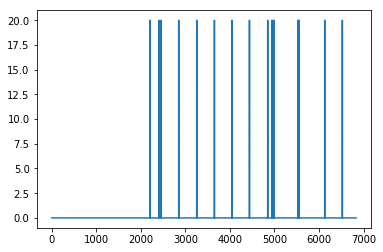

In [6]:
import matplotlib.pyplot as plt
print(np.mean(reward_lst))
plt.plot(reward_lst)

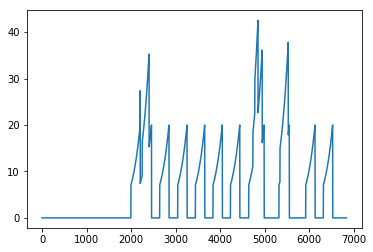

In [7]:
plt.plot(agent.r_disco)

In [8]:
np.mean(reward_lst)

0.04388531304856641

In [9]:
np.mean(score)

20.0

In [ ]:
#Чтобы анализировать разрешимость задачи
def replicate_reward(sar,border=0,wanted_part=0.5):
    part = np.mean(sar[:,-1:]>border)
    if part==0:
        print('ERROR')
        return(sar)
    else:
        while part<wanted_part:
            sar=np.vstack((sar,sar[np.where(sar[:,-1:]>border)[0],:]))
            part = np.mean(sar[:,-1:]>border)
        print(part)
        return(sar)

In [ ]:
sar=make_sar_table(s_list,a_list,reward_lst)
sar=replicate_reward(sar)
X=sar[1:,:]
Y=sar[:-1,:]
Y=sar[:-1,-1:]
Y=sar[1:,-1:]
sar_width=X.shape[1]
nn = Sequential()
nn.add(Dense(200, input_dim=sar_width, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Dense(200, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Dense(200, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
#nn.add(Dense(sar_width, activation='linear',
#                kernel_initializer='he_uniform'))
nn.add(Dense(1, activation='linear',
                kernel_initializer='he_uniform'))

nn.summary()
nn.compile(loss='mse', optimizer=Adam(lr=0.001))
l=X.shape[0]
X_train=X[:int(l/2),:]
Y_train=Y[:int(l/2),:]
X_test=X[int(l/2):,:]
Y_test=Y[int(l/2):,:]
nn.fit(X_train, Y_train, batch_size=1200,epochs=30000, verbose=1)

In [ ]:
Y_pred=np.array(nn.predict(X_test),ndmin=2)
mse = np.mean((Y_pred-Y_test)**2)
print(mse)
rmae=np.mean(np.abs(Y_pred-Y_test))/np.mean(np.abs(Y_test))
print(rmae)
rmae_diversed=np.mean(np.abs(Y_pred-Y_test),axis=0)/np.mean(np.abs(Y_test),axis=0)
print(rmae_diversed)

In [ ]:
colnumn_num=-1
plt.plot(Y_pred[:3000,colnumn_num])
plt.plot(Y_test[:3000,colnumn_num])
plt.show()

In [ ]:
#train (переобучение?)
Y_pred=np.array(nn.predict(X_train),ndmin=2)
mse = np.mean((Y_pred-Y_train)**2)
print(mse)
rmae=np.mean(np.abs(Y_pred-Y_train))/np.mean(np.abs(Y_train))
print(rmae)
rmae_diversed=np.mean(np.abs(Y_pred-Y_train),axis=0)/np.mean(np.abs(Y_train),axis=0)
print(rmae_diversed)

colnumn_num=-1
plt.plot(Y_pred[:1300,colnumn_num])
plt.plot(Y_train[:1300,colnumn_num])
plt.show()

In [ ]:
import xgboost as xgb
xgbparams = {
    'booster':'gbtree',
    'metric':'mse',
    'objective':'reg:squarederror',
    'verbosity':0,
    'max_depth': 7,
    'n_estimators': 90,
    'eta': 0.3,
    'nthreads': 2,
    'seed':0
}
nn=xgb.XGBRegressor(**xgbparams)
nn.fit(X_train[:int(l/4),:], Y_train[:int(l/4),:],
           eval_set=[(X_train[int(l/4):,:], Y_train[int(l/4):,:])],
           verbose=True)

In [ ]:
import pandas as pd
df=pd.DataFrame(sar)
df[df[13]>0]